# Plot the CO line spectra using GoFish 
##### https://github.com/richteague/gofish

In [7]:
import numpy as np
from astropy import units as u
from astropy.io import fits
from spectral_cube import SpectralCube
import pyspeckit
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### First define misc stuff

In [8]:
data_path = '/Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/'

file_cube_12CO = data_path+'DraChi.briggs0.12CO.velcor.fixVel.lsrk.im.image.fits'
file_cube_13CO = data_path+'DraChi.briggs0.13CO.velcor.fixVel.lsrk.im.image.fits'
file_cube_C18O = data_path+'DraChi.briggs0.C18O.velcor.fixVel.lsrk.im.image.fits'

In [9]:
### rest frequencies from the 12CO (2-1), 13CO (2-1) and C180 (2-1) lines
rest_freq_12CO = 230.538*u.GHz
rest_freq_13CO = 220.39868*u.GHz
rest_freq_C18O = 219.56035*u.GHz

### Now plot the individual spectra first and play around with GoFish's capabilities

12CO Integrated Flux = 35435 mJy km/s
uncertainty, dy= 0.36025413485651897  Jy km/s


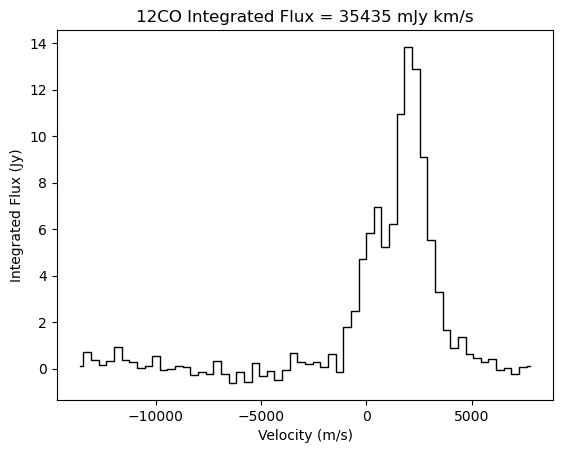

In [10]:
from gofish import imagecube
cube_12CO = imagecube(file_cube_12CO, FOV=22.)

fig, ax = plt.subplots()
x_12CO, y_12CO, dy_12CO = cube_12CO.integrated_spectrum(r_min=0, r_max=1e5, inc=80.0, PA=342.) # use the PA from the PS1 image!
#ax.errorbar(x, y, dy, fmt=' ', capsize=1.25, capthick=1.25, color='k', lw=1.0)
ax.set_title('12CO Integrated Flux = {:.0f} mJy km/s'.format(np.trapz(y_12CO, x_12CO)), fontsize=12)
ax.step(x_12CO, y_12CO, where='mid', color='k', lw=1.0)
ax.set_xlabel('Velocity (m/s)')
ax.set_ylabel('Integrated Flux (Jy)')

print('12CO Integrated Flux = {:.0f} mJy km/s'.format(np.trapz(y_12CO, x_12CO)))
print('uncertainty, dy=', np.trapz(dy_12CO, x_12CO)/1000., ' Jy km/s')

Text(0, 0.5, 'Integrated Flux (Jy/beam km/s)')

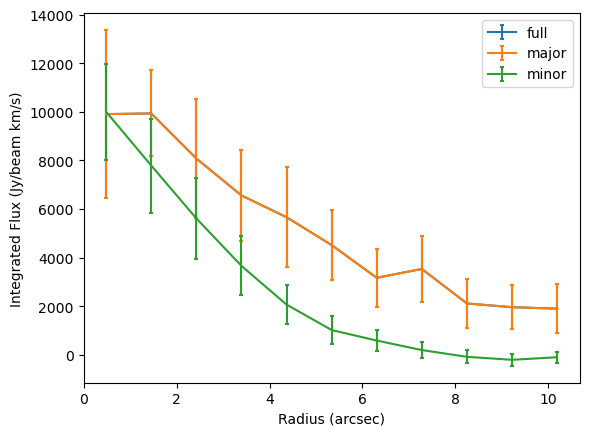

In [11]:
fig, ax = plt.subplots()

# radial profile from the full azimuth.
x, y, dy = cube_12CO.radial_profile(inc=80., PA=342.)
ax.errorbar(x, y, dy, capsize=1.5, capthick=1.5, label='full')

# radial profile from the major axis.
x, y, dy = cube_12CO.radial_profile(inc=80., PA=342., PA_min=300.,
                               PA_max=380., abs_PA=True, exclude_PA=True)
ax.errorbar(x, y, dy, capsize=1.5, capthick=1.5, label='major')

# radial profile from the minor axis.
x, y, dy = cube_12CO.radial_profile(inc=6.5, PA=70., PA_min=40.0,
                               PA_max=100.0, abs_PA=True, exclude_PA=False)
ax.errorbar(x, y, dy, capsize=1.5, capthick=1.5, label='minor')

ax.legend()
ax.set_xlabel('Radius (arcsec)')
ax.set_ylabel('Integrated Flux (Jy/beam km/s)')

13CO Integrated Flux = 13991 mJy km/s
uncertainty, dy= 0.3043188556885391  Jy km/s


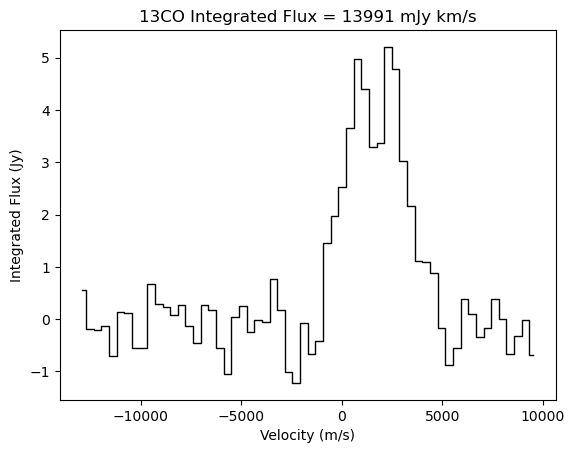

In [12]:
from gofish import imagecube
cube_13CO = imagecube(file_cube_13CO, FOV=22.)

fig, ax = plt.subplots()
x_13CO, y_13CO, dy_13CO = cube_13CO.integrated_spectrum(r_min=0, r_max=1e5, inc=80.0, PA=342.)
#ax.errorbar(x, y, dy, fmt=' ', capsize=1.25, capthick=1.25, color='k', lw=1.0)
ax.set_title('13CO Integrated Flux = {:.0f} mJy km/s'.format(np.trapz(y_13CO, x_13CO)), fontsize=12)
ax.step(x_13CO, y_13CO, where='mid', color='k', lw=1.0)
ax.set_xlabel('Velocity (m/s)')
ax.set_ylabel('Integrated Flux (Jy)')

print('13CO Integrated Flux = {:.0f} mJy km/s'.format(np.trapz(y_13CO, x_13CO)))
print('uncertainty, dy=', np.trapz(dy_13CO, x_13CO)/1000., ' Jy km/s')


C18O Integrated Flux = 8624 mJy km/s
uncertainty, dy= 0.3389862826619291  Jy km/s


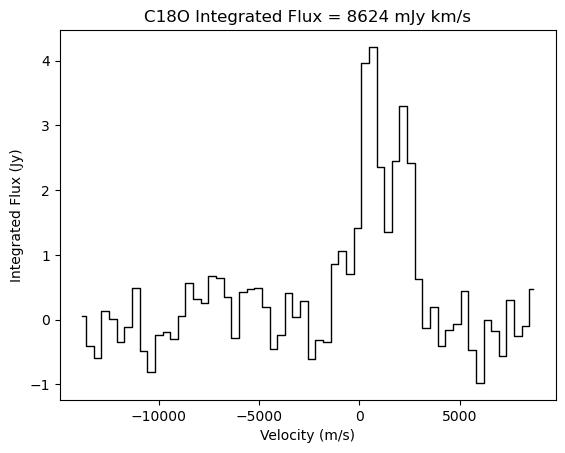

In [13]:
from gofish import imagecube
cube_C18O = imagecube(file_cube_C18O, FOV=22.)

fig, ax = plt.subplots()
x_C18O, y_C18O, dy_C18O = cube_C18O.integrated_spectrum(r_min=0, r_max=1e5, inc=80.0, PA=342.)
#ax.errorbar(x, y, dy, fmt=' ', capsize=1.25, capthick=1.25, color='k', lw=1.0)
ax.set_title('C18O Integrated Flux = {:.0f} mJy km/s'.format(np.trapz(y_C18O, x_C18O)), fontsize=12)
ax.step(x_C18O, y_C18O, where='mid', color='k', lw=1.0)
ax.set_xlabel('Velocity (m/s)')
ax.set_ylabel('Integrated Flux (Jy)')

print('C18O Integrated Flux = {:.0f} mJy km/s'.format(np.trapz(y_C18O, x_C18O)))
print('uncertainty, dy=', np.trapz(dy_C18O, x_C18O)/1000., ' Jy km/s')



### Now produce the paper version plot including all three lines

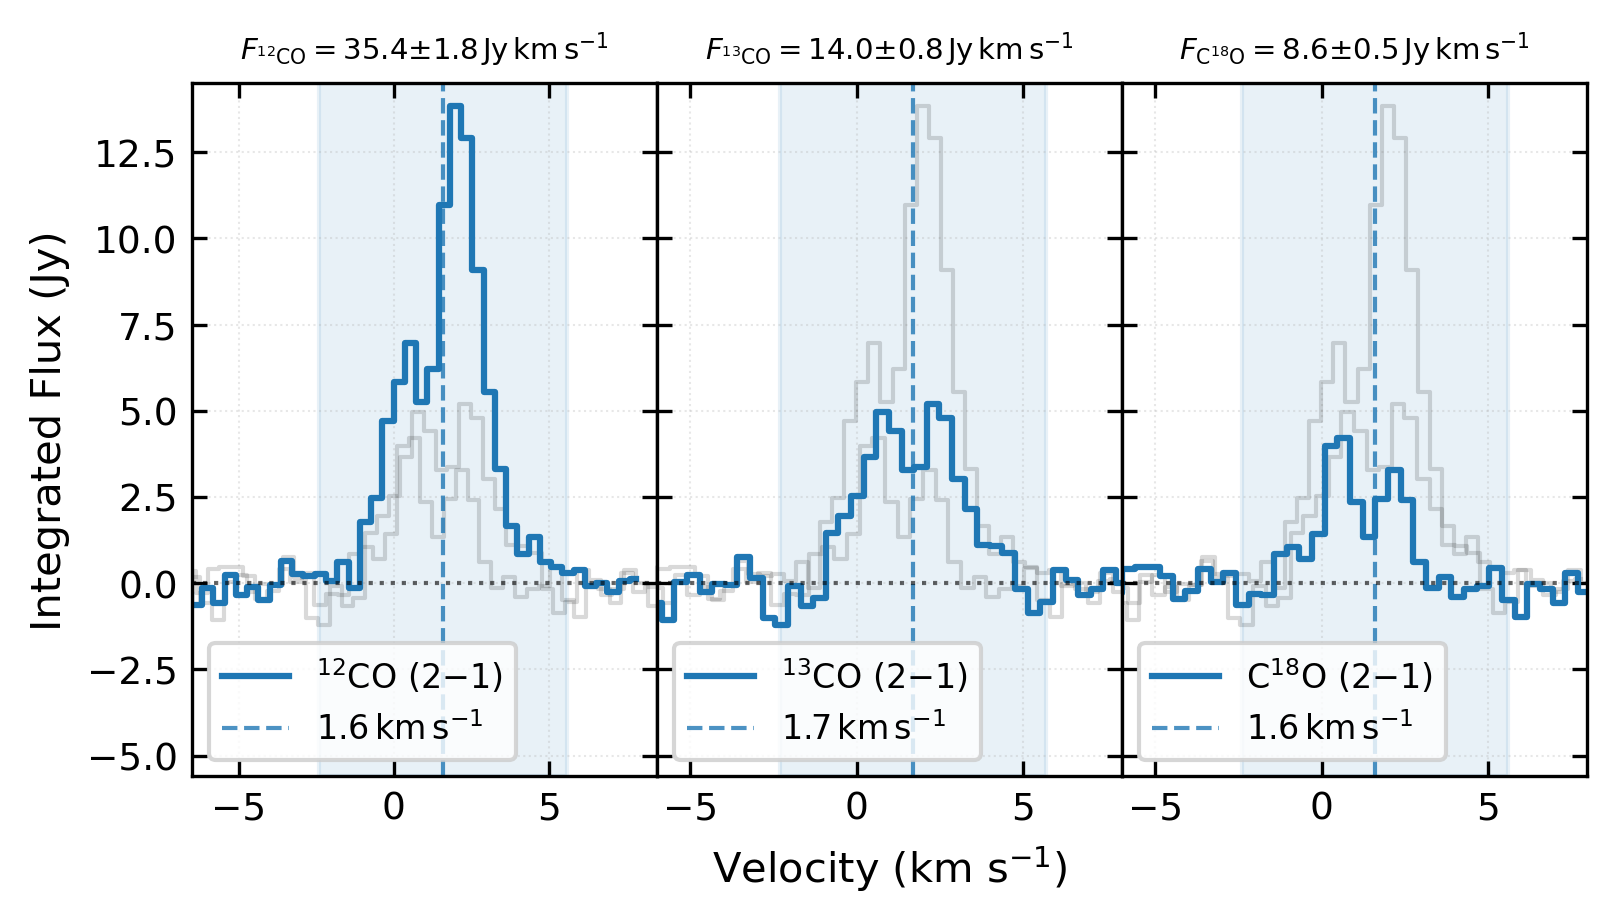

In [14]:
from gofish import imagecube
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

cube_12CO = imagecube(file_cube_12CO, FOV=22.)
cube_13CO = imagecube(file_cube_13CO, FOV=22.)
cube_C18O = imagecube(file_cube_C18O, FOV=22.)

fig, ax = plt.subplots(1, 3, sharey=True, dpi=300, figsize=(6,3))
plt.subplots_adjust(wspace=0)
plt.subplots_adjust(hspace=0)

x, y, dy = cube_12CO.integrated_spectrum(r_min=0, r_max=1e5, inc=80.0, PA=342.)
x2, y2, dy2 = cube_13CO.integrated_spectrum(r_min=0, r_max=1e5, inc=80.0, PA=342.)
x3, y3, dy3 = cube_C18O.integrated_spectrum(r_min=0, r_max=1e5, inc=80.0, PA=342.)


plt.subplot(131)
ax[0].step(x2/1e3, y2, where='mid', color='black', ls='-', alpha=0.15, lw=1, label='')#, label='Integrated Flux = {:.0f} Jy km/s'.format(np.trapz(y2, x2)/1e3))
ax[0].step(x3/1e3, y3, where='mid', color='black', ls='-', alpha=0.15, lw=1., label='')#, label='Integrated Flux = {:.0f} Jy km/s'.format(np.trapz(y3, x3)/1e3))
ax[0].step(x/1e3, y, where='mid', color='C0', ls='-', alpha=1., lw=1.5, label='$^{12}$CO (2$-$1)')#, label='Integrated Flux = {:.0f} Jy km/s'.format(np.trapz(y, x)/1e3))
ax[0].axvline(1.6, lw=1, ls='--', color='C0', alpha=0.8, label='$1.6\,\mathrm{km\,s}^{-1}$')
ax[0].axhline(0, lw=1, ls=':', color='black', alpha=0.6, label='')
ax[0].axvspan(-2.4, 5.6, color='C0', alpha=0.1)

ax[0].tick_params(axis="both", which='both', color='black', labelsize=9, direction="in", top=True, right=True)
ax[0].set_ylabel('Integrated Flux (Jy)', fontsize=10)
ax[0].legend(fontsize=8, loc='lower left')
ax[0].set_xlim(-6.5, 8.5)
#ax[0].set_xticks(np.arange(-6,10,4))
### NOTE: GoFish does NOT include instrumental uncertainty but only provides the error of the fit; thus we need to add the instrumental error in quadrature to the error in of the fit 
err_12CO = np.sqrt((0.05*np.trapz(y_12CO, x_12CO))**2. + (np.trapz(dy_12CO, x_12CO))**2. )
ax[0].set_title(r'$F_{{^{12}\mathrm{{CO}}}}=$'+str(np.round(np.trapz(y_12CO, x_12CO)/1000.,1))+'$\pm$'+str(np.round(err_12CO/1000.,1))+r'$\,\mathrm{Jy\,km\,s^{-1}}$', fontsize=7)
ax[0].grid(alpha=0.3, ls=':', lw=0.5)
    

plt.subplot(132)
ax[1].step(x/1e3, y, where='mid', color='black', ls='-', alpha=0.15, lw=1, label='')#, label='Integrated Flux = {:.0f} Jy km/s'.format(np.trapz(y, x)/1e3))
ax[1].step(x3/1e3, y3, where='mid', color='black', ls='-', alpha=0.15, lw=1., label='')#, label='Integrated Flux = {:.0f} Jy km/s'.format(np.trapz(y3, x3)/1e3))
ax[1].step(x2/1e3, y2, where='mid', color='C0', ls='-', alpha=1, lw=1.5, label='$^{13}$CO (2$-$1)')#, label='Integrated Flux = {:.0f} Jy km/s'.format(np.trapz(y2, x2)/1e3))
ax[1].axvline(1.7, lw=1, ls='--', color='C0', alpha=0.8, label='$1.7\,\mathrm{km\,s}^{-1}$')
ax[1].axhline(0, lw=1, ls=':', color='black', alpha=0.6, label='')
ax[1].axvspan(-2.3, 5.7, color='C0', alpha=0.1)

ax[1].tick_params(axis="both", which='both', color='black', labelsize=9, direction="in", top=True, right=True)
ax[1].set_xlabel('Velocity (km s$^{-1}$)', fontsize=10)
ax[1].legend(fontsize=8, loc='lower left')
ax[1].set_xlim(-6, 8)
### NOTE: GoFish does NOT include instrumental uncertainty but only provides the error of the fit; thus we need to add the instrumental error in quadrature to the error in of the fit 
err_13CO = np.sqrt((0.05*np.trapz(y_13CO, x_13CO))**2. + (np.trapz(dy_13CO, x_13CO))**2. )
ax[1].set_title(r'$F_{{^{13}\mathrm{{CO}}}}=$'+str(np.round(np.trapz(y_13CO, x_13CO)/1000.,1))+'$\pm$'+str(np.round(err_13CO/1000.,1))+r'$\,\mathrm{Jy\,km\,s^{-1}}$', fontsize=7)
ax[1].grid(alpha=0.3, ls=':', lw=0.5)



plt.subplot(133)
ax[2].step(x/1e3, y, where='mid', color='black', ls='-', alpha=0.15, lw=1, label='')#, label='Integrated Flux = {:.0f} Jy km/s'.format(np.trapz(y, x)/1e3))
ax[2].step(x2/1e3, y2, where='mid', color='black', ls='-', alpha=0.15, lw=1, label='')#, label='Integrated Flux = {:.0f} Jy km/s'.format(np.trapz(y2, x2)/1e3))
ax[2].step(x3/1e3, y3, where='mid', color='C0', ls='-', alpha=1, lw=1.5, label='C$^{18}$O (2$-$1)')#, label='Integrated Flux = {:.0f} Jy km/s'.format(np.trapz(y3, x3)/1e3))
ax[2].axvline(1.6, lw=1, ls='--', color='C0', alpha=0.8, label='$1.6\,\mathrm{km\,s}^{-1}$')
ax[2].axhline(0, lw=1, ls=':', color='black', alpha=0.6, label='')
ax[2].axvspan(-2.4, 5.6, color='C0', alpha=0.1)

ax[2].tick_params(axis="both", which='both', color='black', labelsize=9, direction="in", top=True, right=True)
ax[2].tick_params(axis='x', which='minor', bottom=True, top=True)
ax[2].legend(fontsize=8, loc='lower left')
ax[2].set_xlim(-6, 8)
### NOTE: GoFish does NOT include instrumental uncertainty but only provides the error of the fit; thus we need to add the instrumental error in quadrature to the error in of the fit 
err_C18O = np.sqrt((0.05*np.trapz(y_C18O, x_C18O))**2. + (np.trapz(dy_C18O, x_C18O))**2. )
ax[2].set_title(r'$F_{{\mathrm{{C^{18}O}}}}=$'+str(np.round(np.trapz(y_C18O, x_C18O)/1000.,1))+'$\pm$'+str(np.round(err_C18O/1000.,1))+r'$\,\mathrm{Jy\,km\,s^{-1}}$', fontsize=7)
ax[2].grid(alpha=0.3, ls=':', lw=0.5)


plt.ylim(-5.6,14.5)
fig.savefig('../plots/paper_plots/integrated_spectra_3.pdf', bbox_inches='tight')